``PROJETO I - Física Computacional: ``
 **GABRIEL FERREIRA DA COSTA - 19.1.4047**
**/ JONAS DE ANDRADE OLIVEIRA  - 19.1.4052**

# ***Visão geral:***

In [1]:
#Introduzindo ao código as bibliotecas de interesse
import numpy as np
import matplotlib.pyplot as plt

***Problema)*** 
Um flutuador esférico com ``massa`` $m=70 kg$ e ``diâmetro`` de $90 cm$ é colocado no oceano (a ``densidade da água do mar`` é de aproximadamente $1030\frac{kg}{m^{3}}$). A ``altura`` $h$ da porção emersa do flutuador pode ser determinada igualando-se a massa do flutuador com a ``massa`` $m_{f}$ ``de fluido deslocado``.

$$a) \rho.V_{imerso}=m_{f}$$

Deve-se demonstrar a Eq.$(a)$ usando o ``princípio de Arquimedes`` e ``empuxo``. Sabendo-se que o ``volume de uma calota esférica com profundidade`` $d$ é dado por:

$$b) V_{calota}= \frac{1}{3}.\pi.d^{2}(3r-d)$$

Reescreva a Eq.$(b)$ em termos de $h$ e determine ``qual a altura do seu flutuador fica para fora da água``.

<center>

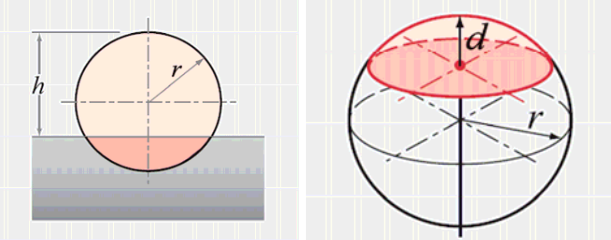

</center>

**Raciocínio)** ``O Princípio de Arquimedes pode ser enunciado como:`` **"Todo corpo mergulhado num fluido em repouso sofre, por parte do fluido, uma força vertical para cima, cuja intensidade é igual ao peso do fluido deslocado pelo corpo".** 

O princípio de Arquimedes se resume a: 
$$E=\rho.V_{imerso}.g$$

Como ``a força peso do corpo é dada pela produto da massa`` $m$ ``pela aceleração da gravidade`` $g$, podemos enunciar o seguinte critério:

**I)** $\rho.V_{imerso}<m$, o corpo afunda;

**II)** $\rho.V_{imerso}=m$ o corpo fica em equilíbrio;

**III)** $\rho.V_{imerso}>m$ ``o corpo flutua``.

<center>

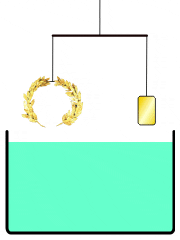

</center>

``Portanto para um corpo que flutua, o empuxo tem que superar o peso, isto é:``
$$E>P$$

Rememorando: 

$$E=P_{fluido}$$
$$E=m_{f}.g$$
$$E=\rho.V_{imerso}.g$$
A ``altura`` $h$ vai ser $h=2r-d$, logo $d=2r-h$. Substituindo em $b)$ teremos:

$$V_{imerso}=\frac{1}{3}.\pi.(2r-h)^{2}.(r+h)$$

Substituindo:

$$E=\rho.\frac{1}{3}.\pi.(2r-h)^{2}.(r+h).g$$

O problema nos disse para ``igualar a massa do flutuador com a massa`` $m_{f}$ ``de fluido deslocado``. Ele quer saber ``qual altura o flutuador ficará para fora d'água``.

$$∴E-P_{flutuador}=0$$
$$\rho.\frac{1}{3}.\pi.(2r-h)^{2}.(r+h).g-m_{f}.g=0$$

Dividindo ambos os lados por $g$ e ajustando o problema aos dados fornecidos:

  * $m=m_{f}=70 kg$ $→$ ``Massa do flutuador esférico``
  * $r_{flutuador}=r=0,45m$ $→$ ``Raio do flutuador esférico``
  * $\rho_{água-mar}=\rho=1030\frac{kg}{m^{3}}$ $→$ ``Densidade da água do mar``
  * $h= ?$ $→$ ``Altura desejada`` 

$$1030.\frac{1}{3}.\pi.(2r-h)^{2}.(r+h)-70=0$$
$$f(h)=1030.\frac{1}{3}.\pi.(2r-h)^{2}.(r+h)-70$$

Sabemos que: $(2r-h)^{2}.(r+h)= 4r^3-3h^2r+h^3$. Derivando nossa f(h) temos então:
$(0,3645-1,35h^{2}+h^{3})$, tudo isso multiplicando todas aquelas constantes:

$$f'(h)=1030.\frac{1}{3}.\pi.(3h^{2}-2,70h)

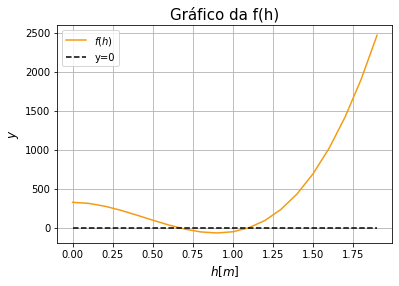

In [2]:
f = lambda h: 1030 * (1 / 3) * np.pi * ((0.9 - h) ** 2) * (0.45 + h) - 70 # Função do problema
df = lambda h: 1030 * (1 / 3) * np.pi * (3 * (h ** 2) - 2.7 * h) # Derivada da função

t = np.arange(0, 2, 0.1)
plt.plot(t,f(t),color = '#F39C12', label = r"$f(h)$")
plt.title("Gráfico da f(h)", size = 15)
plt.xlabel(r"$h[m]$", size = 12,), plt.ylabel(r"$y$", size = 12)
plt.plot(t, 0*t, "k--", label = "y=0")
plt.grid(True)
plt.legend()
plt.show()

Plotando o gráfico podemos analisar e ver os ``intervalos de interesse:`` $[0.50,0.75]$ ``e`` $[1.00,1.25]$.

# **Métodos:**

***Método da Bisseção:***
O método da bisseção é um método de ```confinamento``` usado para se obter a solução de uma equação na forma $f(x) = 0$ quando se sabe que, dentro de um dado intervalo $[a, b]$, $f(x)$ é contínua e a equação possui uma solução. ```Quando esse é o caso```, $f(x)$ ```tem sinais opostos nos pontos finais do intervalo```.

Se $f(x)$ é contínua e tem uma solução entre os pontos $x = a$ e $x = b$, então ou $f(a) > 0$ e $f(b) < 0$ ou $f(a) < 0$ e $f(b) > 0$. Em outras palavras, ```se há uma solução entre``` $x = a$ ```e``` $x = b$, ```então``` $f(a).f(b) < 0$.

Ou seja, como $f: [a,b] → \mathbb{R}, y = f(x)$, tendo $f(a)$ e $f(b)$ sinais opostos e $f(a).f(b) < 0$, nestas condições, o ``teorema do valor intermediário garante a existência de uma raiz no intervalo`` $(a,b)$. Iterativamente dividiremos o intervalo no seu ponto médio $c=\frac{(a+b)}{2}$ e então verificaremos em qual dos ``dois subintervalos`` poderemos garantir a ``existência de uma raiz``.

<center>

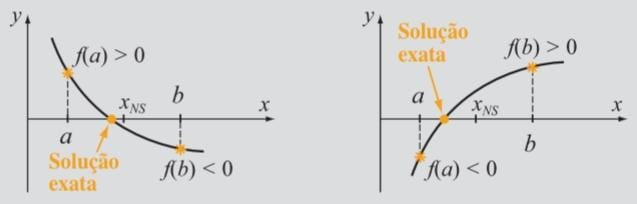

</center>

Repetiremos o processo até a parada em ``itmax``. Abaixo encontra-se o trecho detalhado de código:

In [3]:
def Bissecao(f, a, b, tol, itmax):
    e = [] # Vetor que armazena as tolerância atual
    g = [] # Vetor que armazena a distancia atual
    count = 0
    fa = f(a)
    if abs(fa) < tol:
        return a
    fb = f(b)
    if(abs(fb) < tol):
        return b
    if(fa * fb > 0):
        print("Não podemos afirmar que há raiz no intervalo!")
        return None
    print("k           aK             bK         |bK - aK|          xK            f(xK)")
    for _ in range(itmax):
        e.append(abs((b - a) / 2))
        g.append(b-a)
        count += 1
        c = (a + b) / 2
        fc = f(c)
        print(f"{_ + 1}    |    {a:0.4f}    |    {b:0.4f}    |    {abs(b - a):0.4f}    |    {c:0.4f}    |    {fc:0.4f}")
        if(abs(b - a) < tol):
            break
        if(abs(fc) < tol):
            break
        if(fa * fc > 0):
            a, fa = c, fc
        if(fb * fc > 0):
            b, fb = c, fc
    print(f"\nO resultado aproximado obtido em {count:0.0f} iterações é : {c:0.6f} / f(raiz) = {f(c):0.6f}")
    return e,g

***Método da Secante:***
O método da secante é um método numérico para resolver equações não lineares $f(x)=0$. O artifício ``usa dois pontos na vizinhança da solução para determinar a nova solução estimada``.

Os dois pontos (marcados como $x_{1}$ e $x_{2}$) são usados para ``definir uma linha reta (reta secante)``, e o ponto ``onde essa reta intercepta o eixo`` $x$ (marcado como $x_{3}$) ``é a nova solução estimada``. Conforme ilustrado abaixo, ``ambos os pontos podem estar de um lado da solução``, ``ou a solução pode estar entre os dois pontos``.

<center>

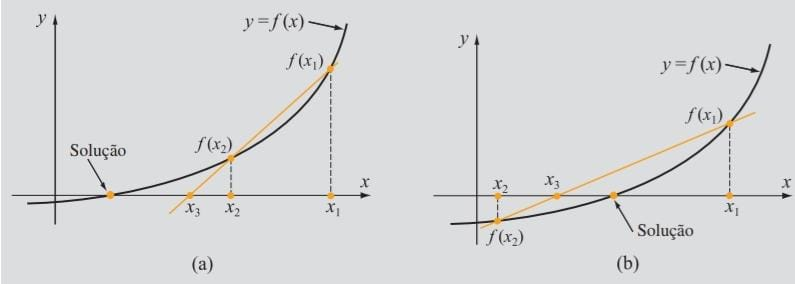

</center>

A inclinação da reta secante é dada por:
$$\frac{f(x_1)-f(x_2)}{x_1-x_2} = \frac{f(x_2)-0}{x_2-x_3}$$
que pode ser resolvida para $x_3$:
$$x_3 = \frac{x_2-f(x_2)(x_1-x_2)}{f(x_1)-f(x_2)}$$

Assim que o ponto $x_3$ é determinado, ele é usado juntamente com o ponto $x_2$ para calcular a próxima estimativa da solução, $x_4$. A equação anterior pode ser generalizada para gerar uma ``fórmula iterativa na qual a nova estimativa da solução`` $x_i + 1$ ``é determinada a partir das duas soluções anteriores``, $x_i$ ``e`` $x_i – 1$.

**Sumarizando o conceito em uma condição**: 
$$x_{i+1} = \frac{x_i-f(x_i)(x_{i-1}-x_i)}{f(x_{i-1})-f(x_i)}$$
Abaixo encontra-se o trecho detalhado de código:

In [4]:
def Secante(f, a, b, tol, itmax):
    e = [] # Vetor que armazena a tolerância atual
    g = [] # Vetor que armazena a distancia
    count = 0
    fa = f(a)
    if(abs(fa) < tol):
        return a
    fb = f(b)
    if(abs(fb) < tol):
        return b
    if(fa * fb > 0):
        print("Não podemos afirmar que há raiz no intervalo!")
        return None
    print("k           aK             bK         |bK - aK|          xK            f(xK)")
    for _ in range(itmax):
        if(abs(fb) < tol):
            break
        x2 = (a * fb - b * fa) / (fb - fa)
        print(f"{_ + 1}    |    {a:0.4f}    |    {b:0.4f}    |    {abs(b - a):0.4f}    |    {x2:0.4f}    |    {f(x2):0.4f}")
        e.append(abs(x2 - b))
        g.append(abs(b-a))
        a,  b  = b,  x2
        fa, fb = fb, f(x2)
        count += 1
    print(f"\nO resultado aproximado obtido em {count:0.0f} iterações é : {x2:0.6f} / f(raiz) = {f(x2):0.6f}")
    return e,g

***Método de Newton-Raphson:*** Desenvolvido por Isaac Newton **$(1643-1727)$** e Joseph Raphson **$(1648-1715)$**, tem o objetivo de ``estimar as raízes de uma função``. Para isso, escolhe-se uma ``aproximação inicial`` para esta. Após isso, calcula-se a ``equação da reta tangente`` (por meio da ``derivada``) da ``função nesse ponto`` e a ``interseção dela com o eixo das abcissas``, a fim de encontrar uma melhor ``aproximação para a raiz``. Repetindo-se o processo, cria-se um ``método iterativo`` para encontrarmos a raiz da função. Em notação matemática, o método de Newton é dado pela seguinte ``sequência recursiva``:
$$x_{n+1}=x_{n}-\frac{f(x_{n})}{f'(x_{n})},n\in\mathbb{N}$$
onde $x_{0}$ é uma ``aproximação inicial dada``, $n$ indica a $n$``-ésima iteração do algoritmo`` e $f'(x_n)$ é a ``derivada da função`` $f$ ``no ponto`` $x_{n}$.

<center>

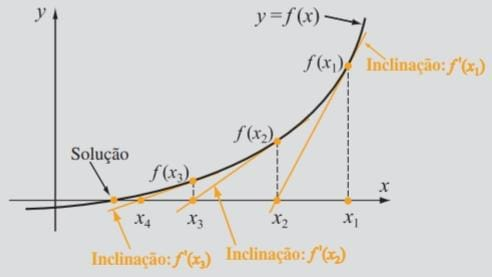 

</center>

In [5]:
def NewtonRaphson(f, df, Estimativa, Tol, Itmax):
    e = [None] # Vetor que armazena as tolerância atual
    g = [] # Vetor que armazena a distancia
    count = 0 
    raiz = 0
    print("k           xK            f(xK)")
    for _ in range(Itmax): # Queremos que a operação se repita até um número máximo de iterações "Itmax"
        Xi = f(Estimativa) # Retorno da função calculada na nossa Estimativa
        if(abs(Xi) < Tol):
            raiz = Estimativa
        d_fXi = df(Estimativa)
        aux = Estimativa
        if(abs(d_fXi) == 0):
            print("Erro! Derivada = 0") #Erro
            break
        else:
            dx = -Xi / d_fXi
        print(f"{_ + 1}    |    {Estimativa:0.4f}    |    {f(Estimativa):0.4f}")
        Estimativa += dx #Incrementando o valor do nosso chute inicial
        e.append(abs(Estimativa - aux))
        g.append(abs(Xi))
        count += 1
        if(abs(dx) < Tol):
            raiz = Estimativa
            break
    print(f"\nO resultado aproximado obtido em {count:0.0f} iterações é : {raiz:0.6f} / f(raiz) = {f(raiz):0.6f}")
    return e,g

# **Análise dos dados:**

Usaremos três tolerâncias para melhor visualização dos resultados -> [0,001; 0,0001; 0.00001];

Usaremos também os intervalos -> [0,50; 0,75] e [1.00, 1.25];

Testaremos todos os métodos para 10 iterações máximas, assim teremos um melhor comparativo entre os métodos.

Ao analizar os dados dos graficos abaixo fica nitido que o metodo de Newton se sobressai sobre os demais no quesito tolerancia versus iterações.

Ainda é possivel notar um comportamento semelhante a uma função exponencial, nos metodos de Bisseção e Secante, tanto nos graficos de tolerância versus iterações quanto distancia versus iterações. No gráfico de distância do método de Newton é possivel notar um comportamento um pouco diferente, mesmo que ele sempre se aproxime do valor da raiz, ele não se assemelha com uma curva exponecial, isso provavelmente se deve ao fato dele utilizar a inclinação da reta para encontrar o proximo valor.

Se tratando de equações razoavelmente simples todos os trés metodos levaram quase o mesmo tempo para compilar gerando entre 1,5 s e 2,5 s, mostrando que neste caso qualquer um deles consegue calcular a raiz sem nenhum problema.

In [6]:
Intervalos = [0.50, 0.75, 1.00, 1.25]
Tol = [0.01, 0.001, 0.0001]

def ImpressaoIterXTol(Tolerancias):
    Iteracoes = np.arange(1, len(Tolerancias) + 1, 1)
    plt.plot(Iteracoes, Tolerancias, "r")
    plt.title("Gráfico de Iterações x Tolerâncias", size = 15)
    plt.xlabel(r"$Iterações$", size = 12,), plt.ylabel(r"$Tolerâncias$", size = 12)
    plt.grid(True)
    plt.show() 

def ImpressaoIterXDist(Distancia):
    Iteracoes = np.arange(1, len(Distancia) + 1, 1)
    plt.plot(Iteracoes, Distancia, "r")
    plt.title("Gráfico de Iterações x Distancia", size = 15)
    plt.xlabel(r"$Iterações$", size = 12,), plt.ylabel(r"$Distancia$", size = 12)
    plt.grid(True)
    plt.show() 

Intervalo -> [0.50, 0.75]
Tol -> 0.01
k           aK             bK         |bK - aK|          xK            f(xK)
1    |    0.5000    |    0.7500    |    0.2500    |    0.6250    |    17.6879
2    |    0.6250    |    0.7500    |    0.1250    |    0.6875    |    -14.5968
3    |    0.6250    |    0.6875    |    0.0625    |    0.6562    |    0.8938
4    |    0.6562    |    0.6875    |    0.0312    |    0.6719    |    -7.0268
5    |    0.6562    |    0.6719    |    0.0156    |    0.6641    |    -3.1087
6    |    0.6562    |    0.6641    |    0.0078    |    0.6602    |    -1.1178

O resultado aproximado obtido em 6 iterações é : 0.660156 / f(raiz) = -1.117839


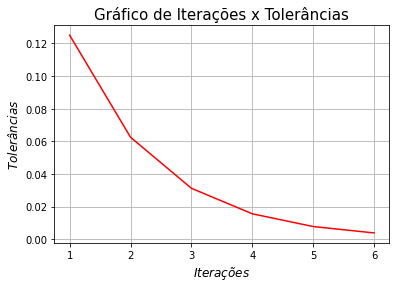

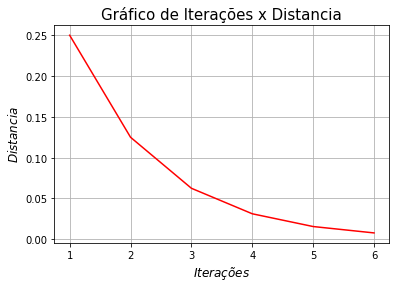



Tol -> 0.001
k           aK             bK         |bK - aK|          xK            f(xK)
1    |    0.5000    |    0.7500    |    0.2500    |    0.6250    |    17.6879
2    |    0.6250    |    0.7500    |    0.1250    |    0.6875    |    -14.5968
3    |    0.6250    |    0.6875    |    0.0625    |    0.6562    |    0.8938
4    |    0.6562    |    0.6875    |    0.0312    |    0.6719    |    -7.0268
5    |    0.6562    |    0.6719    |    0.0156    |    0.6641    |    -3.1087
6    |    0.6562    |    0.6641    |    0.0078    |    0.6602    |    -1.1178
7    |    0.6562    |    0.6602    |    0.0039    |    0.6582    |    -0.1146
8    |    0.6562    |    0.6582    |    0.0020    |    0.6572    |    0.3890
9    |    0.6572    |    0.6582    |    0.0010    |    0.6577    |    0.1370

O resultado aproximado obtido em 9 iterações é : 0.657715 / f(raiz) = 0.137040


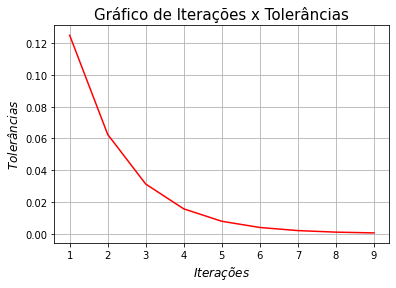

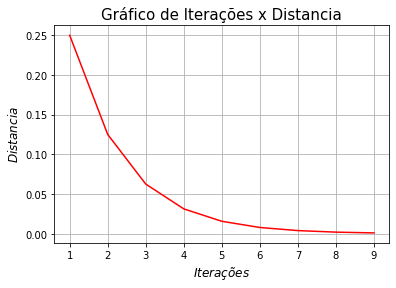



Tol -> 0.0001
k           aK             bK         |bK - aK|          xK            f(xK)
1    |    0.5000    |    0.7500    |    0.2500    |    0.6250    |    17.6879
2    |    0.6250    |    0.7500    |    0.1250    |    0.6875    |    -14.5968
3    |    0.6250    |    0.6875    |    0.0625    |    0.6562    |    0.8938
4    |    0.6562    |    0.6875    |    0.0312    |    0.6719    |    -7.0268
5    |    0.6562    |    0.6719    |    0.0156    |    0.6641    |    -3.1087
6    |    0.6562    |    0.6641    |    0.0078    |    0.6602    |    -1.1178
7    |    0.6562    |    0.6602    |    0.0039    |    0.6582    |    -0.1146
8    |    0.6562    |    0.6582    |    0.0020    |    0.6572    |    0.3890
9    |    0.6572    |    0.6582    |    0.0010    |    0.6577    |    0.1370
10    |    0.6577    |    0.6582    |    0.0005    |    0.6580    |    0.0112

O resultado aproximado obtido em 10 iterações é : 0.657959 / f(raiz) = 0.011190


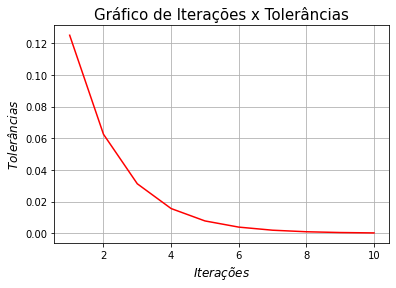

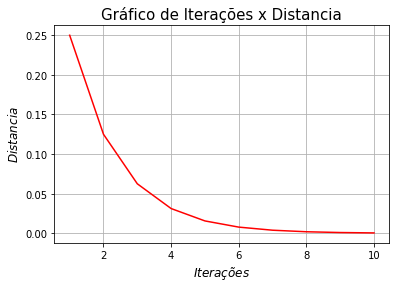

In [7]:
print("Intervalo -> [0.50, 0.75]")
print(f"Tol -> {Tol[0]}")
Atual,dist = Bissecao(f, Intervalos[0], Intervalos[1], Tol[0], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)
print("\n")
print(f"Tol -> {Tol[1]}")
Atual,dist = Bissecao(f, Intervalos[0], Intervalos[1], Tol[1], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)
print("\n")
print(f"Tol -> {Tol[2]}")
Atual,dist = Bissecao(f, Intervalos[0], Intervalos[1], Tol[2], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)


**Bisseção:**

Intervalo -> [1.00, 1.25]
Tol -> 0.01
k           aK             bK         |bK - aK|          xK            f(xK)
1    |    1.0000    |    1.2500    |    0.2500    |    1.1250    |    16.0026
2    |    1.0000    |    1.1250    |    0.1250    |    1.0625    |    -26.9208
3    |    1.0625    |    1.1250    |    0.0625    |    1.0938    |    -7.4933
4    |    1.0938    |    1.1250    |    0.0312    |    1.1094    |    3.7337
5    |    1.0938    |    1.1094    |    0.0156    |    1.1016    |    -2.0085
6    |    1.1016    |    1.1094    |    0.0078    |    1.1055    |    0.8302

O resultado aproximado obtido em 6 iterações é : 1.105469 / f(raiz) = 0.830236


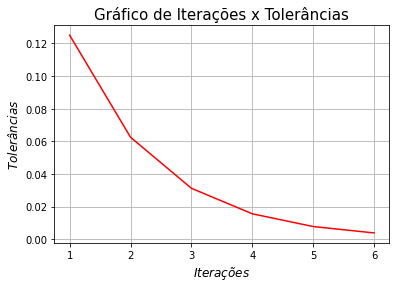

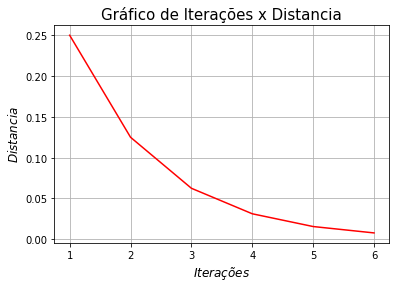



Tol -> 0.001
k           aK             bK         |bK - aK|          xK            f(xK)
1    |    1.0000    |    1.2500    |    0.2500    |    1.1250    |    16.0026
2    |    1.0000    |    1.1250    |    0.1250    |    1.0625    |    -26.9208
3    |    1.0625    |    1.1250    |    0.0625    |    1.0938    |    -7.4933
4    |    1.0938    |    1.1250    |    0.0312    |    1.1094    |    3.7337
5    |    1.0938    |    1.1094    |    0.0156    |    1.1016    |    -2.0085
6    |    1.1016    |    1.1094    |    0.0078    |    1.1055    |    0.8302
7    |    1.1016    |    1.1055    |    0.0039    |    1.1035    |    -0.5972
8    |    1.1035    |    1.1055    |    0.0020    |    1.1045    |    0.1145
9    |    1.1035    |    1.1045    |    0.0010    |    1.1040    |    -0.2419

O resultado aproximado obtido em 9 iterações é : 1.104004 / f(raiz) = -0.241856


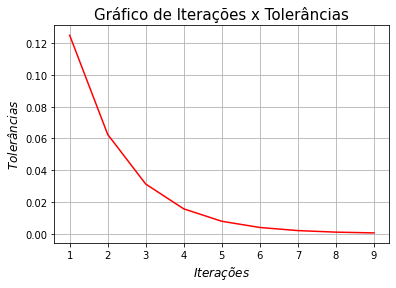

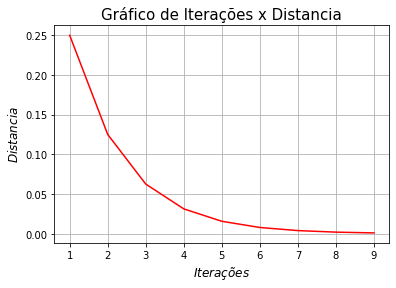



Tol -> 0.0001
k           aK             bK         |bK - aK|          xK            f(xK)
1    |    1.0000    |    1.2500    |    0.2500    |    1.1250    |    16.0026
2    |    1.0000    |    1.1250    |    0.1250    |    1.0625    |    -26.9208
3    |    1.0625    |    1.1250    |    0.0625    |    1.0938    |    -7.4933
4    |    1.0938    |    1.1250    |    0.0312    |    1.1094    |    3.7337
5    |    1.0938    |    1.1094    |    0.0156    |    1.1016    |    -2.0085
6    |    1.1016    |    1.1094    |    0.0078    |    1.1055    |    0.8302
7    |    1.1016    |    1.1055    |    0.0039    |    1.1035    |    -0.5972
8    |    1.1035    |    1.1055    |    0.0020    |    1.1045    |    0.1145
9    |    1.1035    |    1.1045    |    0.0010    |    1.1040    |    -0.2419
10    |    1.1040    |    1.1045    |    0.0005    |    1.1042    |    -0.0638

O resultado aproximado obtido em 10 iterações é : 1.104248 / f(raiz) = -0.063805


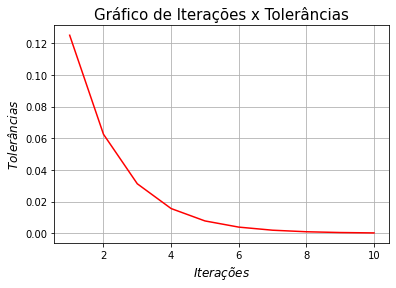

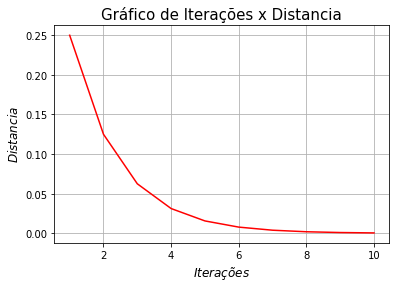

In [8]:
print("Intervalo -> [1.00, 1.25]")
print(f"Tol -> {Tol[0]}")
Atual,dist = Bissecao(f, Intervalos[2], Intervalos[3], Tol[0], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)
print("\n")
print(f"Tol -> {Tol[1]}")
Atual,dist = Bissecao(f, Intervalos[2], Intervalos[3], Tol[1], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)
print("\n")
print(f"Tol -> {Tol[2]}")
Atual,dist = Bissecao(f, Intervalos[2], Intervalos[3], Tol[2], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)

**Secante:**

Intervalo -> [0.50, 0.75]
Tol -> 0.01
k           aK             bK         |bK - aK|          xK            f(xK)
1    |    0.5000    |    0.7500    |    0.2500    |    0.6742    |    -8.1778
2    |    0.7500    |    0.6742    |    0.0758    |    0.6552    |    1.4132
3    |    0.6742    |    0.6552    |    0.0190    |    0.6580    |    -0.0310
4    |    0.6552    |    0.6580    |    0.0028    |    0.6580    |    -0.0001

O resultado aproximado obtido em 4 iterações é : 0.657981 / f(raiz) = -0.000110


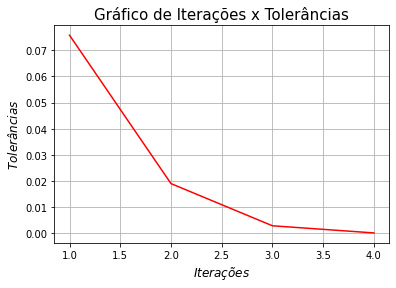

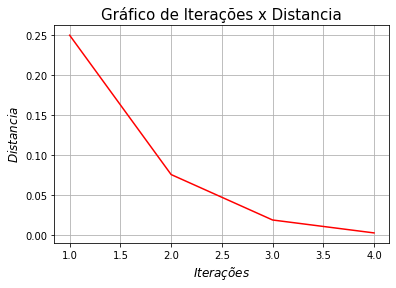



Tol -> 0.001
k           aK             bK         |bK - aK|          xK            f(xK)
1    |    0.5000    |    0.7500    |    0.2500    |    0.6742    |    -8.1778
2    |    0.7500    |    0.6742    |    0.0758    |    0.6552    |    1.4132
3    |    0.6742    |    0.6552    |    0.0190    |    0.6580    |    -0.0310
4    |    0.6552    |    0.6580    |    0.0028    |    0.6580    |    -0.0001

O resultado aproximado obtido em 4 iterações é : 0.657981 / f(raiz) = -0.000110


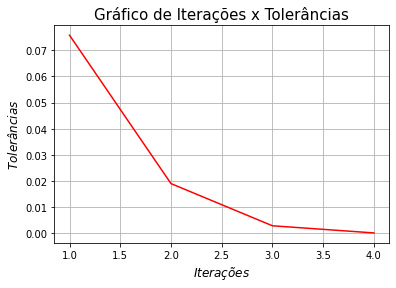

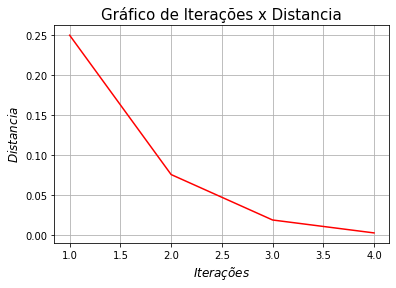



Tol -> 0.0001
k           aK             bK         |bK - aK|          xK            f(xK)
1    |    0.5000    |    0.7500    |    0.2500    |    0.6742    |    -8.1778
2    |    0.7500    |    0.6742    |    0.0758    |    0.6552    |    1.4132
3    |    0.6742    |    0.6552    |    0.0190    |    0.6580    |    -0.0310
4    |    0.6552    |    0.6580    |    0.0028    |    0.6580    |    -0.0001
5    |    0.6580    |    0.6580    |    0.0001    |    0.6580    |    0.0000

O resultado aproximado obtido em 5 iterações é : 0.657981 / f(raiz) = 0.000000


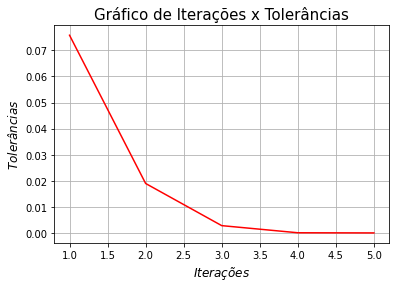

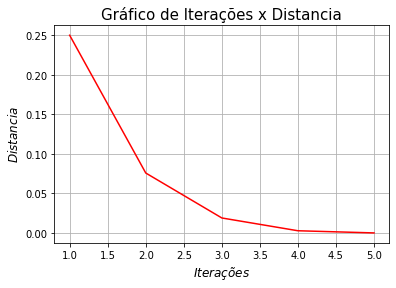

In [9]:
print("Intervalo -> [0.50, 0.75]")
print(f"Tol -> {Tol[0]}")
Atual,dist = Secante(f, Intervalos[0], Intervalos[1], Tol[0], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)
print("\n")
print(f"Tol -> {Tol[1]}")
Atual,dist = Secante(f, Intervalos[0], Intervalos[1], Tol[1], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)
print("\n")
print(f"Tol -> {Tol[2]}")
Atual,dist = Secante(f, Intervalos[0], Intervalos[1], Tol[2], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)

Intervalo -> [1.00, 1.25]
Tol -> 0.01
k           aK             bK         |bK - aK|          xK            f(xK)
1    |    1.0000    |    1.2500    |    0.2500    |    1.0650    |    -25.4947
2    |    1.2500    |    1.0650    |    0.1850    |    1.0912    |    -9.2206
3    |    1.0650    |    1.0912    |    0.0262    |    1.1060    |    1.2550
4    |    1.0912    |    1.1060    |    0.0148    |    1.1043    |    -0.0488
5    |    1.1060    |    1.1043    |    0.0018    |    1.1043    |    -0.0002

O resultado aproximado obtido em 5 iterações é : 1.104335 / f(raiz) = -0.000241


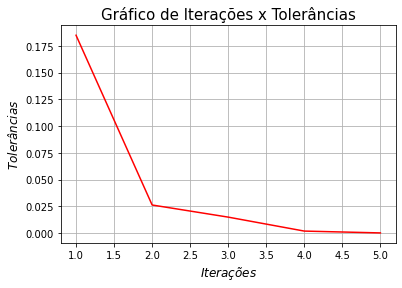

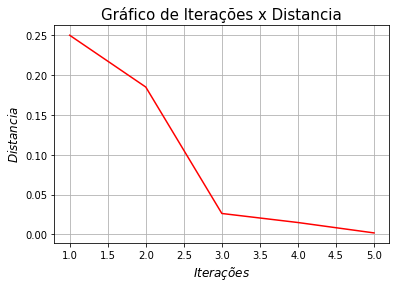



Tol -> 0.001
k           aK             bK         |bK - aK|          xK            f(xK)
1    |    1.0000    |    1.2500    |    0.2500    |    1.0650    |    -25.4947
2    |    1.2500    |    1.0650    |    0.1850    |    1.0912    |    -9.2206
3    |    1.0650    |    1.0912    |    0.0262    |    1.1060    |    1.2550
4    |    1.0912    |    1.1060    |    0.0148    |    1.1043    |    -0.0488
5    |    1.1060    |    1.1043    |    0.0018    |    1.1043    |    -0.0002

O resultado aproximado obtido em 5 iterações é : 1.104335 / f(raiz) = -0.000241


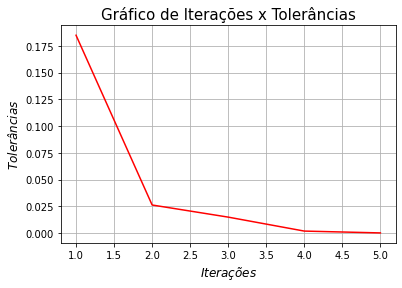

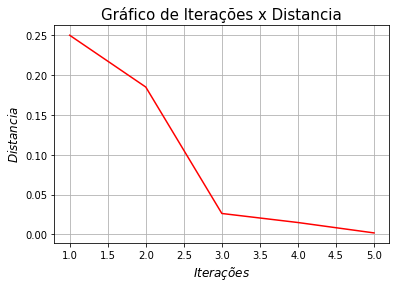



Tol -> 0.0001
k           aK             bK         |bK - aK|          xK            f(xK)
1    |    1.0000    |    1.2500    |    0.2500    |    1.0650    |    -25.4947
2    |    1.2500    |    1.0650    |    0.1850    |    1.0912    |    -9.2206
3    |    1.0650    |    1.0912    |    0.0262    |    1.1060    |    1.2550
4    |    1.0912    |    1.1060    |    0.0148    |    1.1043    |    -0.0488
5    |    1.1060    |    1.1043    |    0.0018    |    1.1043    |    -0.0002
6    |    1.1043    |    1.1043    |    0.0001    |    1.1043    |    0.0000

O resultado aproximado obtido em 6 iterações é : 1.104335 / f(raiz) = 0.000000


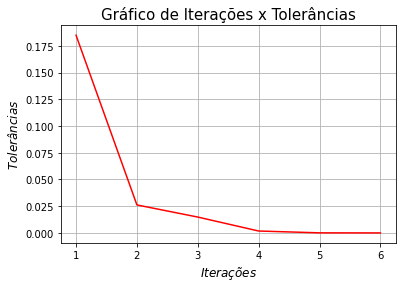

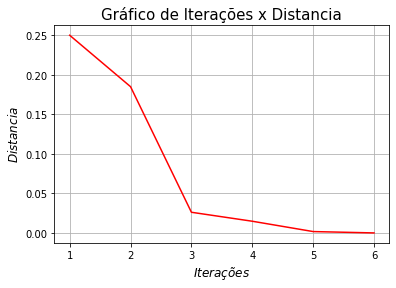

In [10]:
print("Intervalo -> [1.00, 1.25]")
print(f"Tol -> {Tol[0]}")
Atual,dist = Secante(f, Intervalos[2], Intervalos[3], Tol[0], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)
print("\n")
print(f"Tol -> {Tol[1]}")
Atual,dist = Secante(f, Intervalos[2], Intervalos[3], Tol[1], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)
print("\n")
print(f"Tol -> {Tol[2]}")
Atual,dist = Secante(f, Intervalos[2], Intervalos[3], Tol[2], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)

**Newton-Raphson:**

Estimativa -> [0.50]
Tol -> 0.01
k           xK            f(xK)
1    |    0.5000    |    93.9492
2    |    0.6452    |    6.7095
3    |    0.6578    |    0.1026

O resultado aproximado obtido em 3 iterações é : 0.657981 / f(raiz) = 0.000027


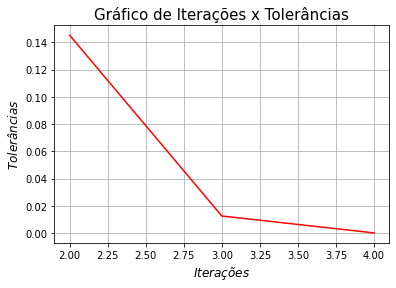

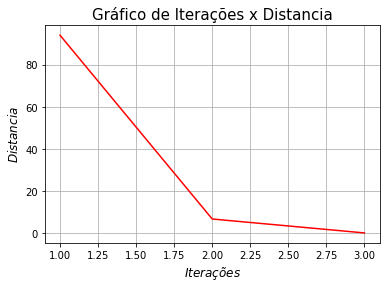



Tol -> 0.001
k           xK            f(xK)
1    |    0.5000    |    93.9492
2    |    0.6452    |    6.7095
3    |    0.6578    |    0.1026

O resultado aproximado obtido em 3 iterações é : 0.657981 / f(raiz) = 0.000027


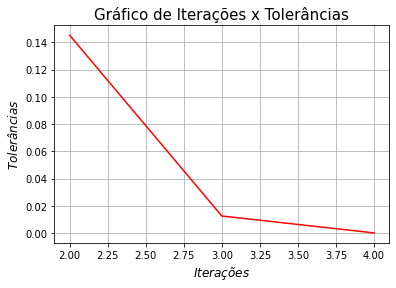

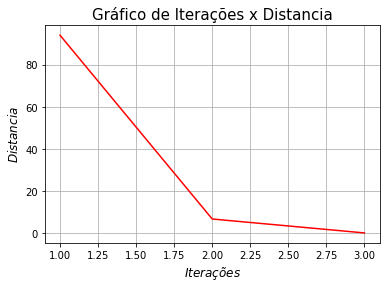



Tol -> 0.0001
k           xK            f(xK)
1    |    0.5000    |    93.9492
2    |    0.6452    |    6.7095
3    |    0.6578    |    0.1026
4    |    0.6580    |    0.0000

O resultado aproximado obtido em 4 iterações é : 0.657981 / f(raiz) = 0.000000


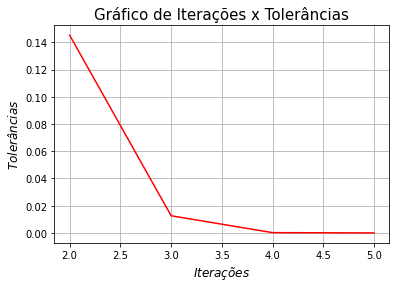

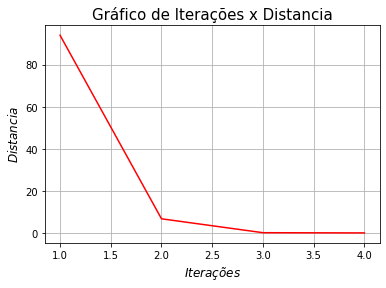

In [11]:
print("Estimativa -> [0.50]")
print(f"Tol -> {Tol[0]}")
Atual,dist = NewtonRaphson(f, df, Intervalos[0], Tol[0], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)
print("\n")
print(f"Tol -> {Tol[1]}")
Atual,dist = NewtonRaphson(f, df, Intervalos[0], Tol[1], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)
print("\n")
print(f"Tol -> {Tol[2]}")
Atual,dist = NewtonRaphson(f, df, Intervalos[0], Tol[2], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)

Estimativa -> [0.75]
Tol -> 0.01
k           xK            f(xK)
1    |    0.7500    |    -40.8774
2    |    0.6377    |    10.7132
3    |    0.6575    |    0.2463

O resultado aproximado obtido em 3 iterações é : 0.657980 / f(raiz) = 0.000153


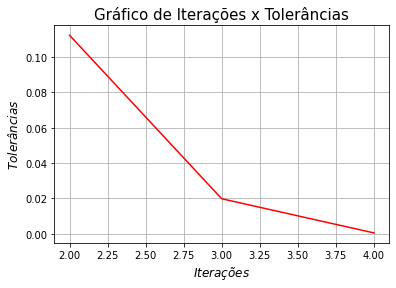

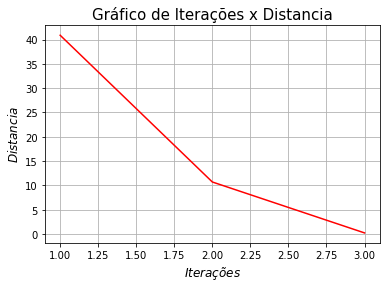



Tol -> 0.001
k           xK            f(xK)
1    |    0.7500    |    -40.8774
2    |    0.6377    |    10.7132
3    |    0.6575    |    0.2463

O resultado aproximado obtido em 3 iterações é : 0.657980 / f(raiz) = 0.000153


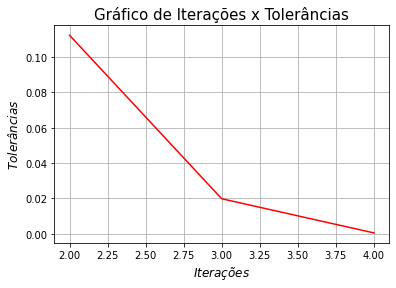

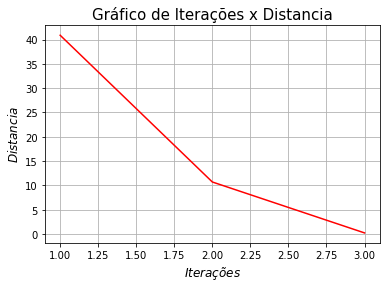



Tol -> 0.0001
k           xK            f(xK)
1    |    0.7500    |    -40.8774
2    |    0.6377    |    10.7132
3    |    0.6575    |    0.2463
4    |    0.6580    |    0.0002

O resultado aproximado obtido em 4 iterações é : 0.657981 / f(raiz) = 0.000000


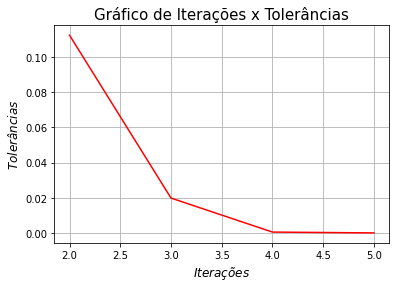

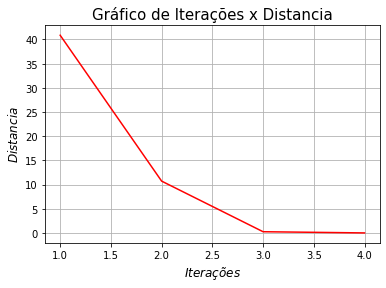

In [12]:
print("Estimativa -> [0.75]")
print(f"Tol -> {Tol[0]}")
Atual,dist = NewtonRaphson(f, df, Intervalos[1], Tol[0], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)
print("\n")
print(f"Tol -> {Tol[1]}")
Atual,dist = NewtonRaphson(f, df, Intervalos[1], Tol[1], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)
print("\n")
print(f"Tol -> {Tol[2]}")
Atual,dist = NewtonRaphson(f, df, Intervalos[1], Tol[2], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)

Estimativa -> [1.00]
Tol -> 0.01
k           xK            f(xK)
1    |    1.0000    |    -54.3601
2    |    1.1680    |    55.3407
3    |    1.1134    |    6.7598

O resultado aproximado obtido em 3 iterações é : 1.104562 / f(raiz) = 0.165282


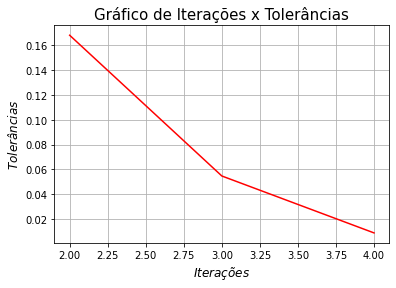

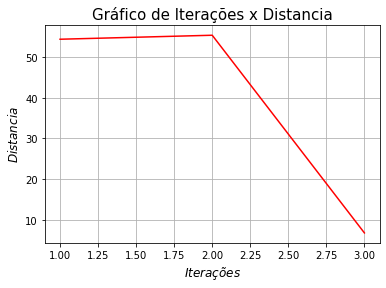



Tol -> 0.001
k           xK            f(xK)
1    |    1.0000    |    -54.3601
2    |    1.1680    |    55.3407
3    |    1.1134    |    6.7598
4    |    1.1046    |    0.1653

O resultado aproximado obtido em 4 iterações é : 1.104336 / f(raiz) = 0.000108


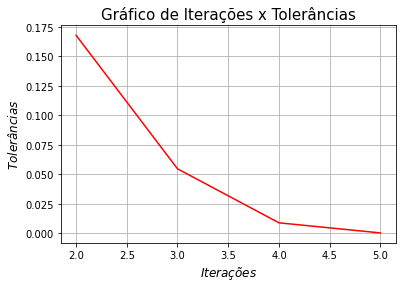

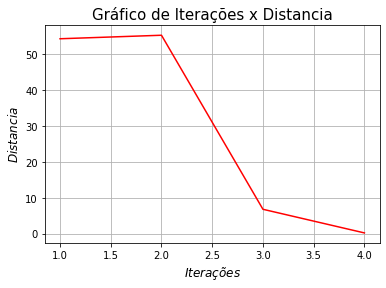



Tol -> 0.0001
k           xK            f(xK)
1    |    1.0000    |    -54.3601
2    |    1.1680    |    55.3407
3    |    1.1134    |    6.7598
4    |    1.1046    |    0.1653
5    |    1.1043    |    0.0001

O resultado aproximado obtido em 5 iterações é : 1.104335 / f(raiz) = 0.000000


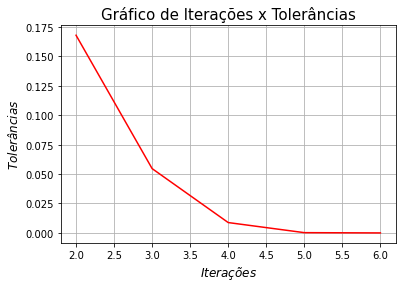

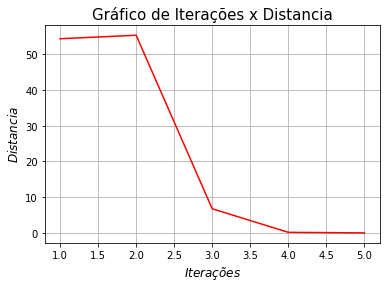

In [13]:
print("Estimativa -> [1.00]")
print(f"Tol -> {Tol[0]}")
Atual,dist = NewtonRaphson(f, df, Intervalos[2], Tol[0], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)
print("\n")
print(f"Tol -> {Tol[1]}")
Atual,dist = NewtonRaphson(f, df, Intervalos[2], Tol[1], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)
print("\n")
print(f"Tol -> {Tol[2]}")
Atual,dist = NewtonRaphson(f, df, Intervalos[2], Tol[2], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)

Estimativa -> [1.25]
Tol -> 0.01
k           xK            f(xK)
1    |    1.2500    |    154.6213
2    |    1.1408    |    29.4752
3    |    1.1076    |    2.4189

O resultado aproximado obtido em 3 iterações é : 1.104366 / f(raiz) = 0.022449


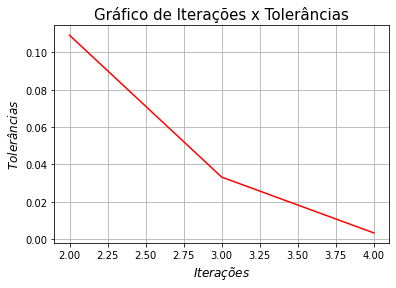

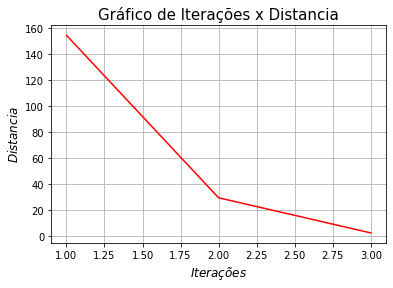



Tol -> 0.001
k           xK            f(xK)
1    |    1.2500    |    154.6213
2    |    1.1408    |    29.4752
3    |    1.1076    |    2.4189
4    |    1.1044    |    0.0224

O resultado aproximado obtido em 4 iterações é : 1.104335 / f(raiz) = 0.000002


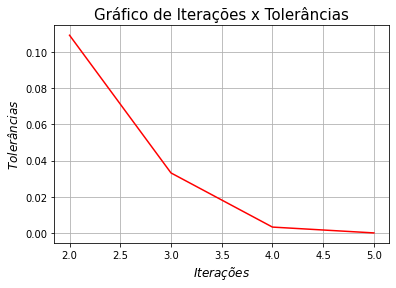

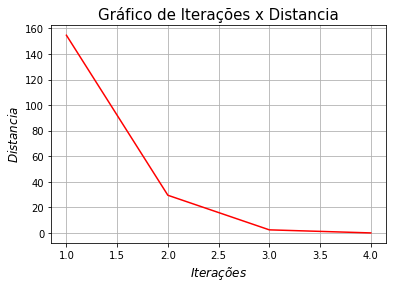



Tol -> 0.0001
k           xK            f(xK)
1    |    1.2500    |    154.6213
2    |    1.1408    |    29.4752
3    |    1.1076    |    2.4189
4    |    1.1044    |    0.0224

O resultado aproximado obtido em 4 iterações é : 1.104335 / f(raiz) = 0.000002


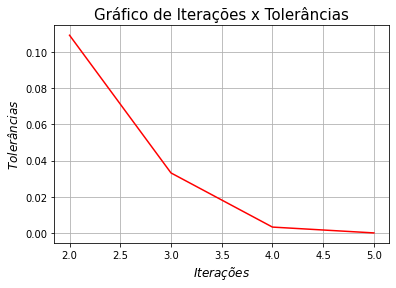

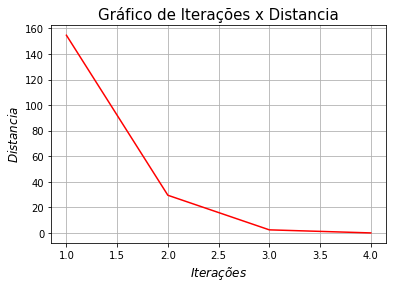

In [14]:
print("Estimativa -> [1.25]")
print(f"Tol -> {Tol[0]}")
Atual,dist = NewtonRaphson(f, df, Intervalos[3], Tol[0], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)
print("\n")
print(f"Tol -> {Tol[1]}")
Atual,dist = NewtonRaphson(f, df, Intervalos[3], Tol[1], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)
print("\n")
print(f"Tol -> {Tol[2]}")
Atual,dist = NewtonRaphson(f, df, Intervalos[3], Tol[2], 10)
ImpressaoIterXTol(Atual)
ImpressaoIterXDist(dist)

# **Conclusão:**
A partir da realização e análise dos 3 métodos, Bisseção, Newton-Raphsom e Secante, foi possível perceber que o método de Newton-Raphsom converge mais rapidamente para a raiz, mesmo com tolerância menores e distancia inicial maior. Os outros métodos mesmo que mais fáceis de implementar em alguns casos, onde a derivada da função possa ser difícil de encontrar ou caso ela não seja continua, acabam perdendo bastante no quesito eficiência. Isso é evidenciado nos gráficos de tolerância versus iterações e distância inicial versus iterações. Em resumo é mais eficiente usar o método de Newton primeiramente e caso ele falhe usa-se um dos outros dois metodos.
<center>

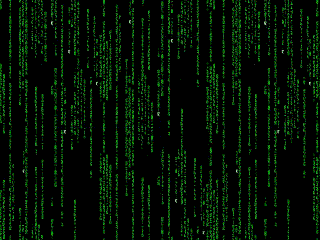

</center>